In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animate
from IPython.display import HTML
%matplotlib inline

In [2]:
def up(poly, head):
    poly = [[head[0], head[1] + 1]] + poly
    poly = poly[:-1]
    return poly

def down(poly,head):
    poly = [[head[0], head[1] -1 ]] + poly
    poly = poly[:-1]
    return poly

def right(poly,head): 
    poly = [[head[0] + 1, head[1]]] + poly
    poly = poly[:-1]
    return poly

def left(poly,head):
    poly = [[head[0] - 1, head[1]]] + poly
    poly = poly[:-1]
    return poly

def random(poly):
    head = poly[0]
    [x,y] = head
    a = np.random.randint(0, 4)
    if a == 0 and not([x+1, y] in poly):
        poly = right(poly,head)
    elif a == 1 and not([x-1, y] in poly):
        poly = left(poly,head)
    elif a == 2 and not([x, y+1] in poly):
        poly = up(poly,head)
    elif a == 3 and not([x, y-1] in poly):
        poly = down(poly,head)
    else:
        poly = random(poly)
    return poly

def change(poly):
    N = len(poly)
    change = []
    for i in range(0, N):
        change.append(poly[N-1-i])
    return change

def occupied(poly):
    head = poly[0]
    [x,y] = head
    if (([x+1, y] in poly) and ([x-1, y]in poly) and ([x, y+1]in poly) and ([x, y-1] in poly)):
        return True
    else:
        return False
    
def endtoend(poly):
    head = np.array(poly[0])
    tail = np.array(poly[-1])
    diff = head-tail
    dist = np.sqrt(np.sum(diff**2))
    return dist #euclidian

def update(poly):
    if occupied(poly):
        polymer = change(poly)
    else:
        polymer = random(poly)
    return polymer

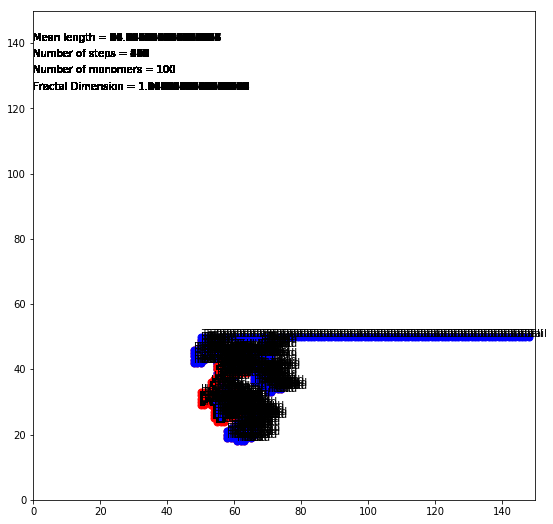

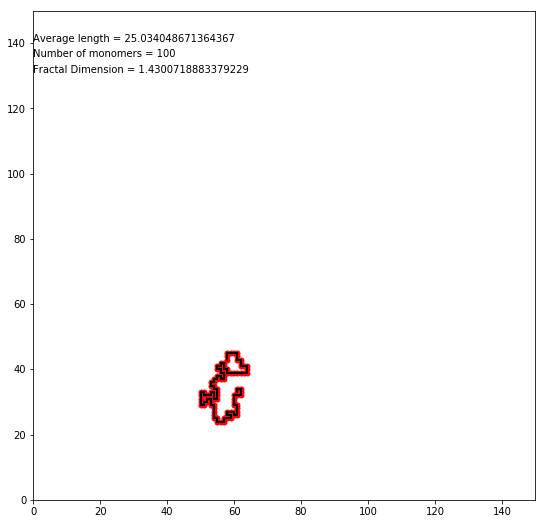

In [6]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ims = []

#np.random.seed(14)
distances = []
poly = []

N = 100
T = 450

for i in range(0, N):
    poly.append([ i+ N/2, N/2])

for t in range(T): 
    poly = update(poly)
    dist = endtoend(poly) #Rn
    distances.append(dist)
    mean = np.average(np.array(distances))
    head = np.array(poly[0])
    tail = np.array(poly[-1])
    
    im3, = ax.plot(np.array(poly)[:, 0], np.array(poly)[:, 1], 'k-',markersize='3',animated=True)
    im, = ax.plot(head[0], head[1], 'ro',markersize='7',animated=True)
    im2, = ax.plot(tail[0], tail[1], 'bo',markersize='7',animated=True)
    a = ax.annotate("Head", xy = (head[0],head[1]))
    b = ax.annotate("Tail", xy = (tail[0],tail[1]))
    c = ax.annotate("Mean length = " + str((mean)), xy = (0,140.75),animated=True)
    d = ax.annotate("Number of steps = " + str(t), xy = (0,135.75),animated=True)
    f = ax.annotate("Number of monomers = " + str(N), xy = (0,130.75),animated=True)
    e = ax.annotate("Fractal Dimension = " + str(np.log(N)/np.log(mean)), xy = (0,125.75),animated=True)
    ax.set_xlim(0,150)
    ax.set_ylim(0,150)
    #ax.axis('off')
    ims.append([im,im2,im3,a,b,c,d,e,f])

    

plt.figure(figsize=(9,9))
for i in poly: 
    plt.plot(i[0],i[1], 'ro',markersize='5')
    plt.plot(np.array(poly)[:, 0], np.array(poly)[:, 1], 'k-')
    
plt.annotate("Average length = " + str((mean)), xy = (0,140.5))
plt.annotate("Number of monomers = " + str(N), xy = (0,135.75),animated=True)
plt.annotate("Fractal Dimension = " + str(np.log(N)/np.log(mean)), xy = (0,130.75),animated=True)
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

In [7]:
ani = animate.ArtistAnimation(fig, ims, interval=150, blit=True)

In [8]:
HTML(ani.to_html5_video())